In [1]:
#  Nome: Jéssica Anecí Freitas Vieira - Matrícula 92206581 - 
#  Componente Aprendizagem não Supervisionada - Trilha 6

In [1]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN


In [2]:
# Lendo o arquivo base e criando o dataframe
df = pd.read_csv ('APNS_6.csv', delimiter=";")

# Visualizando as informações do dataframe
print (df.shape)
df.head()

(1420, 12)


,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA
0,Centro-Oeste,53,DF,5301,Região Integrada de Desenvolvimento do Distrit...,RIDE,530101,NÃO TEM,5300108,BRASÍLIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
1,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200100,ABADIÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
2,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200175,ÁGUA FRIA DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
3,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200258,ÁGUAS LINDAS DE GOIÁS,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998
4,Centro-Oeste,52,GO,5202,Região Integrada de Desenvolvimento do Distrit...,RIDE,520201,NÃO TEM,5200308,ALEXÂNIA,DECRETO Nº 7469 - 04.05.2011 Regulamenta a Lei...,19/02/1998


In [3]:
#  Verificando as colunas para realizar a limpeza 
# dos dados que não seriam utilizados

print(df.columns)
df.info()

Index(['GRANDE_REG', 'COD_UF', 'SIGLA_UF', 'COD', 'NOME', 'TIPO',
       'COD_CAT_ASSOC', 'CAT_ASSOC', 'COD_MUN', 'NOME_MUN', 'LEG', 'DATA'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GRANDE_REG     1420 non-null   object
 1   COD_UF         1420 non-null   int64 
 2   SIGLA_UF       1420 non-null   object
 3   COD            1420 non-null   int64 
 4   NOME           1420 non-null   object
 5   TIPO           1420 non-null   object
 6   COD_CAT_ASSOC  1420 non-null   object
 7   CAT_ASSOC      1420 non-null   object
 8   COD_MUN        1420 non-null   int64 
 9   NOME_MUN       1420 non-null   object
 10  LEG            1420 non-null   object
 11  DATA           1420 non-null   object
dtypes: int64(3), object(9)
memory usage: 133.2+ KB


In [4]:
#  Removendo colunas não desejadas para a ánalise do arquivo.
data = df.drop(['SIGLA_UF','NOME','LEG','COD_CAT_ASSOC','CAT_ASSOC','NOME_MUN','DATA', 'COD_MUN'], axis=1)
print(data.columns)
print("quantidade de colunas:", len(data.columns))

data.head(5)

Index(['GRANDE_REG', 'COD_UF', 'COD', 'TIPO'], dtype='object')
quantidade de colunas: 4


,GRANDE_REG,COD_UF,COD,TIPO
0,Centro-Oeste,53,5301,RIDE
1,Centro-Oeste,52,5202,RIDE
2,Centro-Oeste,52,5202,RIDE
3,Centro-Oeste,52,5202,RIDE
4,Centro-Oeste,52,5202,RIDE


In [5]:
# Verificando os dados únicos da coluna TIPO
print(data['TIPO'].unique())
print(10*"----")
print(data['TIPO'].value_counts())


['RIDE' 'RM' 'AGLO']
----------------------------------------
RM      1290
AGLO      74
RIDE      56
Name: TIPO, dtype: int64


In [6]:
# Discretizando valores das colunas TIPO, GRANDE_REG e COD

tipo = data['TIPO'].values
labelencoder_tipo = LabelEncoder()
tipo = labelencoder_tipo.fit_transform(tipo)
data["TIPO"] = tipo

grande_reg = data['GRANDE_REG'].values
labelencoder_grande_reg = LabelEncoder()
grande_reg = labelencoder_grande_reg.fit_transform(grande_reg)
data["GRANDE_REG"] = grande_reg

cod = data['COD'].values
labelencoder_cod = LabelEncoder()
cod = labelencoder_cod.fit_transform(cod)
data["COD"] = cod

data.head()

,GRANDE_REG,COD_UF,COD,TIPO
0,0,53,85,1
1,0,52,84,1
2,0,52,84,1
3,0,52,84,1
4,0,52,84,1


In [7]:
# Transformando o dataset em um array Numpy para conseguir continuar a analise

dt = data.values
dt = dt.astype('float32')
train_size = int(len(dt) * 0.67)
train_dataset = dt[0:train_size,:]

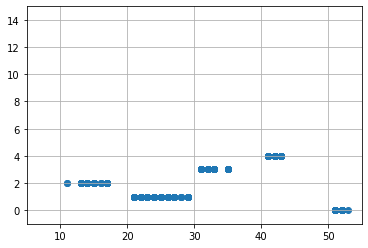

In [13]:
# Plotando o gráfico do dataset sem realizar nenhuma análise após o tratamento dos dados

plt.scatter(dt[:,1], dt[:,0])
plt.xlim(5,55)
plt.ylim(-1, 15)
plt.grid()

In [15]:
# Utilizando o K-means

kmeans = KMeans(n_clusters = 4,
init = 'random', n_init = 10,
max_iter = 400)
pred_y = kmeans.fit_predict(dt)

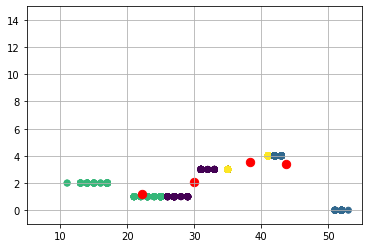

In [16]:
plt.scatter(dt[:,1], dt[:,0], c= pred_y)
plt.xlim(5,55)
plt.ylim(-1, 15)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=70, c="red")
plt.show()

In [17]:
X=data.iloc[:,[1,2]].values

In [18]:
df=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=df.fit(X)
label=model.labels_
label

array([0, 0, 0, ..., 3, 3, 3])

In [19]:
data = DBSCAN(eps=0.5, min_samples=10).fit(X)

/Users/jessicaaneci/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

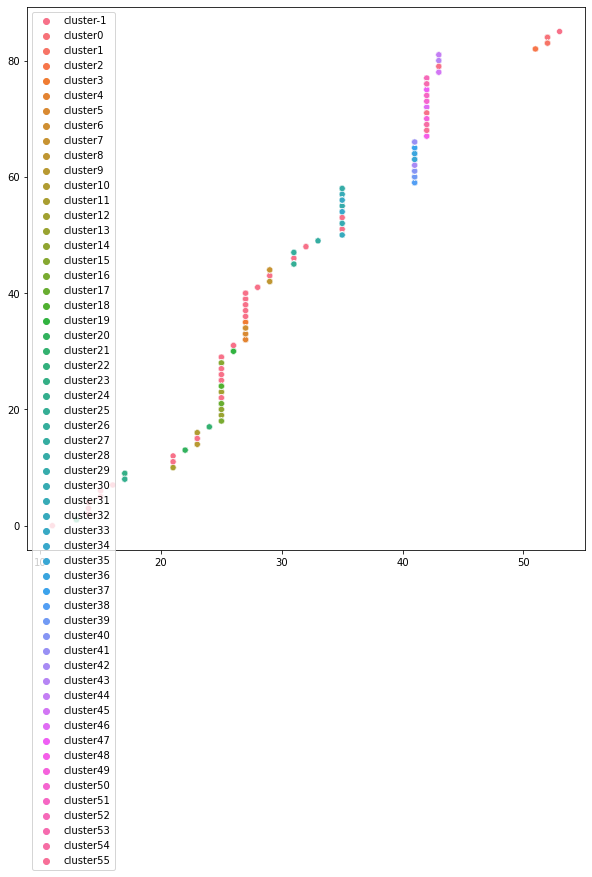

In [20]:
labels = data.labels_
fig= plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],X[:,1] , hue=["cluster{}".format(x) for x in labels])

In [21]:
#  Através desse gráfico deu para notar que os grupos não ficaram bem divididos
#  Nos passos abaixo irei verificar o a distância utilizando o NearestNeighbors
#  Para ajustar o eps para que os grupos fiquem mais bem divididos

In [22]:
from sklearn.neighbors import NearestNeighbors

In [23]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
data = nearest_neighbors.fit(X)
distances, indices = data.kneighbors(X)
distances = np.sort(distances[:,9], axis=0)


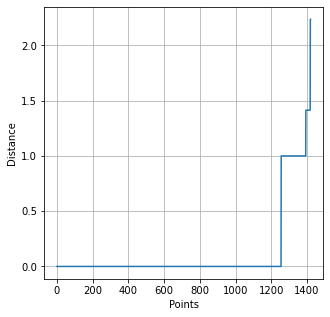

In [24]:
# Plotando o gráfico para analisar e verificar o ponto de distância

fig = plt.figure(figsize=(5,5))
plt.plot(distances)
plt.grid()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

In [25]:
# Rodando o DBSCAN novamente com eps=1 de acordo
# com o gráfico acima.

data = DBSCAN(eps=1, min_samples=10).fit(X)

/Users/jessicaaneci/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

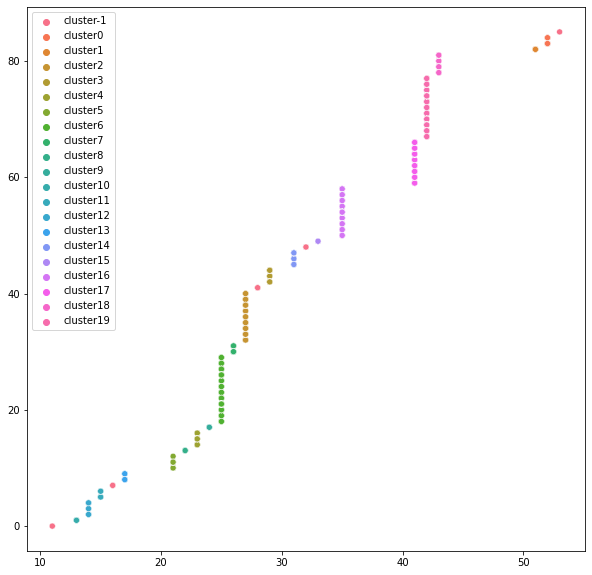

In [26]:
# Plotando novamente o gráfico com o eps de acordo. 
# Dessa vez é possível ver os grupos mais bem definidos, e sendo possível até
# encontrar os dados que podem ser considerados como outliers, 
# demonstrados na cor verde abaixo.

labels = data.labels_
fig= plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],X[:,1] , hue=["cluster{}".format(x) for x in labels])